# Comparative Analysis of Supervised Learning Algorithms
# IE 7275 : Data Mining in Engineering
# <ins> Telecom Enterprise Customer Churn Prediction </ins>

### <font color='blue'> Phase 1: Dataset Selection and Preprocessing </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df_telecom = pd.read_csv("USER_INFO_M.csv", encoding='gbk')

In [3]:
df_telecom.head()

,MONTH_ID,USER_ID,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,CALL_DURA,NO_ROAM_LOCAL_CALL_DURA,...,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,CONSTELLATION_DESC,MANU_NAME,MODEL_NAME,OS_DESC,TERM_TYPE,IS_LOST
0,201601,U3115092040504266,62,1,201609.0,65,99.0,84.95,36891,2699,...,48,64,1.0,29.0,射手座,赫比,YD206,ANDROID 4.4.3,4,NaN
1,201601,U3115090138635105,5,1,201609.0,66,NaN,251.78,28858,889,...,39,30,1.0,23.0,白羊座,赫比,YD206,ANDROID 4.4.3,4,NaN
2,201601,U3115062769878916,171,0,NaN,67,99.0,26.00,14838,14812,...,20,66,1.0,38.0,射手座,赫比,YD206,ANDROID 4.4.3,4,NaN
3,201601,U3115061733263650,8,1,201606.0,66,99.0,139.30,11144,0,...,27,31,2.0,23.0,天蝎座,赫比,YD206,ANDROID 4.4.3,4,NaN
4,201601,U3115060569699130,8,0,NaN,67,99.0,31.95,5528,5528,...,9,13,2.0,33.0,双子座,赫比,YD206,ANDROID 4.4.3,4,NaN


### » General Exploration of Data

In [4]:
df_telecom.columns

Index(['MONTH_ID', 'USER_ID', 'INNET_MONTH', 'IS_AGREE', 'AGREE_EXP_DATE',
       'CREDIT_LEVEL', 'VIP_LVL', 'ACCT_FEE', 'CALL_DURA',
       'NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA',
       'GN_ROAM_CALL_DURA', 'CDR_NUM', 'NO_ROAM_CDR_NUM',
       'NO_ROAM_LOCAL_CDR_NUM', 'NO_ROAM_GN_LONG_CDR_NUM', 'GN_ROAM_CDR_NUM',
       'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX', 'GN_ROAM_FLUX',
       'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 'CALLING_RING',
       'CALLED_RING', 'CUST_SEX', 'CERT_AGE', 'CONSTELLATION_DESC',
       'MANU_NAME', 'MODEL_NAME', 'OS_DESC', 'TERM_TYPE', 'IS_LOST'],
      dtype='object')

In [5]:
df_telecom.describe()

,MONTH_ID,INNET_MONTH,IS_AGREE,AGREE_EXP_DATE,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,CALL_DURA,NO_ROAM_LOCAL_CALL_DURA,NO_ROAM_GN_LONG_CALL_DURA,...,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,TERM_TYPE,IS_LOST
count,900000.000000,900000.000000,900000.000000,459335.000000,900000.00000,588717.000000,900000.000000,9.000000e+05,9.000000e+05,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,865713.000000,865029.000000,900000.000000,300309.000000
mean,201602.000601,34.506348,0.510372,201646.870680,66.01686,80.084567,118.587759,2.188072e+04,1.282879e+04,3517.969780,...,23.419233,19.260233,20.005326,47.649570,29.049902,31.714017,1.329849,32.944663,3.737976,0.032343
std,0.816549,34.231761,0.499893,75.167367,0.95860,37.983347,167.786270,2.549215e+04,1.823407e+04,6687.748777,...,8.082977,8.950069,9.003920,56.115391,40.153907,35.399154,0.470159,10.073679,0.494628,0.176911
min,201601.000000,-251.000000,0.000000,201601.000000,0.00000,2.000000,0.010000,1.000000e+00,0.000000e+00,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,2.000000,0.000000
25%,201601.000000,10.000000,0.000000,201606.000000,65.00000,99.000000,54.807500,5.729000e+03,1.599000e+03,0.000000,...,19.000000,13.000000,14.000000,16.000000,9.000000,10.000000,1.000000,26.000000,4.000000,0.000000
50%,201602.000000,24.000000,1.000000,201610.000000,66.00000,99.000000,86.000000,1.409700e+04,6.629000e+03,914.000000,...,27.000000,21.000000,22.000000,32.000000,19.000000,21.000000,1.000000,31.000000,4.000000,0.000000
75%,201603.000000,49.000000,1.000000,201703.000000,67.00000,99.000000,143.550000,2.870300e+04,1.673500e+04,4292.000000,...,29.000000,27.000000,28.000000,61.000000,36.000000,41.000000,2.000000,38.000000,4.000000,0.000000
max,201603.000000,249.000000,1.000000,205012.000000,67.00000,99.000000,65007.210000,1.333863e+06,1.333863e+06,293483.000000,...,31.000000,31.000000,31.000000,4419.000000,4367.000000,1978.000000,2.000000,93.000000,4.000000,1.000000


In [6]:
df_telecom.isna().sum()

MONTH_ID                          0
USER_ID                           0
INNET_MONTH                       0
IS_AGREE                          0
AGREE_EXP_DATE               440665
CREDIT_LEVEL                      0
VIP_LVL                      311283
ACCT_FEE                          0
CALL_DURA                         0
NO_ROAM_LOCAL_CALL_DURA           0
NO_ROAM_GN_LONG_CALL_DURA         0
GN_ROAM_CALL_DURA                 0
CDR_NUM                           0
NO_ROAM_CDR_NUM                   0
NO_ROAM_LOCAL_CDR_NUM             0
NO_ROAM_GN_LONG_CDR_NUM           0
GN_ROAM_CDR_NUM                   0
P2P_SMS_CNT_UP                    0
TOTAL_FLUX                        0
LOCAL_FLUX                        0
GN_ROAM_FLUX                      0
CALL_DAYS                         0
CALLING_DAYS                      0
CALLED_DAYS                       0
CALL_RING                         0
CALLING_RING                      0
CALLED_RING                       0
CUST_SEX                    

In [7]:
df_telecom.dtypes

MONTH_ID                       int64
USER_ID                       object
INNET_MONTH                    int64
IS_AGREE                       int64
AGREE_EXP_DATE               float64
CREDIT_LEVEL                   int64
VIP_LVL                      float64
ACCT_FEE                     float64
CALL_DURA                      int64
NO_ROAM_LOCAL_CALL_DURA        int64
NO_ROAM_GN_LONG_CALL_DURA      int64
GN_ROAM_CALL_DURA              int64
CDR_NUM                        int64
NO_ROAM_CDR_NUM                int64
NO_ROAM_LOCAL_CDR_NUM          int64
NO_ROAM_GN_LONG_CDR_NUM        int64
GN_ROAM_CDR_NUM                int64
P2P_SMS_CNT_UP                 int64
TOTAL_FLUX                   float64
LOCAL_FLUX                   float64
GN_ROAM_FLUX                 float64
CALL_DAYS                      int64
CALLING_DAYS                   int64
CALLED_DAYS                    int64
CALL_RING                      int64
CALLING_RING                   int64
CALLED_RING                    int64
C

In [8]:
# We will remove the instances in which target variable is missing
df = df_telecom[df_telecom.IS_LOST.isna() != True] 

In [9]:
# Our new dataset shape
print(df.shape)
df.reset_index(inplace = True)

(300309, 35)


### » Preprocessing

In [10]:
warnings.filterwarnings('ignore') 
# Dropping Irrelevant Columns
df.drop(columns = ['index', 'CONSTELLATION_DESC','MANU_NAME', 'MODEL_NAME', 'OS_DESC', 'TERM_TYPE', 'IS_AGREE', 'AGREE_EXP_DATE' ], inplace = True)

In [11]:
df.head()

,MONTH_ID,USER_ID,INNET_MONTH,CREDIT_LEVEL,VIP_LVL,ACCT_FEE,CALL_DURA,NO_ROAM_LOCAL_CALL_DURA,NO_ROAM_GN_LONG_CALL_DURA,GN_ROAM_CALL_DURA,...,GN_ROAM_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,IS_LOST
0,201603,U3116011101365327,3,66,NaN,98.55,44038,35562,8476,0,...,0.000000,30,29,30,134,98,71,1.0,49.0,0.0
1,201603,U3115122549657565,4,66,NaN,55.95,3163,1025,1941,197,...,16.558552,12,10,6,9,8,5,1.0,57.0,0.0
2,201603,U3115122771884179,3,67,NaN,40.70,5889,0,0,5889,...,14.912551,3,1,2,5,4,2,2.0,50.0,1.0
3,201603,U3115122749792284,4,66,NaN,77.15,12749,1813,10936,0,...,0.000000,21,14,12,17,15,6,1.0,47.0,0.0
4,201603,U3115121571754202,4,67,NaN,69.40,14220,2173,12047,0,...,0.000000,26,22,9,9,8,5,1.0,42.0,0.0


In [12]:
df['MONTH_ID'].nunique()

1

In [13]:
# Since the month id of each record is same, it will not play any role in our features set. 
df.drop(columns=['MONTH_ID'], inplace= True)

- The VIP level of the user could indicate their importance to the company and might influence churn. But we cannot find exactly what is determing the VIP Level of a customer and what is the role that it plays becuase it also has approximately 30% of the data missing. It is better to drop the column 

In [14]:
df.drop(columns=['VIP_LVL'], inplace= True)

- Customer Sex and Age can play a role in determing Customer Churn . We will consider these features in our baseline model and remove if they doesn't play a significant role.

In [15]:
# removing the rows with missing customer sex and missing age values 

In [16]:
df.dropna(subset=['CUST_SEX', 'CERT_AGE'], inplace = True)

In [17]:
# Some duplicate values found, should be dropped
len(df) - df['USER_ID'].nunique() 

321

In [18]:
df.drop_duplicates(subset=['USER_ID'], inplace = True)
df.reset_index(inplace = True)

In [19]:
df.columns

Index(['index', 'USER_ID', 'INNET_MONTH', 'CREDIT_LEVEL', 'ACCT_FEE',
       'CALL_DURA', 'NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA',
       'GN_ROAM_CALL_DURA', 'CDR_NUM', 'NO_ROAM_CDR_NUM',
       'NO_ROAM_LOCAL_CDR_NUM', 'NO_ROAM_GN_LONG_CDR_NUM', 'GN_ROAM_CDR_NUM',
       'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'LOCAL_FLUX', 'GN_ROAM_FLUX',
       'CALL_DAYS', 'CALLING_DAYS', 'CALLED_DAYS', 'CALL_RING', 'CALLING_RING',
       'CALLED_RING', 'CUST_SEX', 'CERT_AGE', 'IS_LOST'],
      dtype='object')

In [20]:
# Converting columns to relevant types
df['IS_LOST'] = df['IS_LOST'].astype(int)
df['CERT_AGE'] = df['CERT_AGE'].astype(int)

### <font color='blue'> Phase 2: Feature Selection, Exploratory Data Analysis (EDA) & Preprocessing Continued </font>

In [21]:
df['CREDIT_LEVEL'].value_counts()

CREDIT_LEVEL
67    99386
66    98918
65    86967
0        17
Name: count, dtype: int64

- Keeping **Total_flux** instead of **LOCAL_FLUX (FLUX of Data used Locally)** and **GN_ROAM_FLUX (FLUX of data used in roaming)** as a part of feature reduction
- **Credit Level** Data is ambigious & does not imply well in this context, we can drop it 

In [22]:
df.drop(columns=['LOCAL_FLUX', 'GN_ROAM_FLUX', 'CREDIT_LEVEL'], inplace = True)

In [23]:
confidence = 0
for i in range(len(df)):
    if df['CALL_DURA'][i] == (df['NO_ROAM_LOCAL_CALL_DURA'][i] + df['NO_ROAM_GN_LONG_CALL_DURA'][i] + df['GN_ROAM_CALL_DURA'][i]):
        confidence+=1       

In [24]:
confidence/len(df) * 100 

97.57227783853509

- We are **97.5** %confident that **CALL_DURATION** is exactly or approximately equal to all the other Call durations. Thus we can reduce the other featues and only keep **Total Call Duration** as our feature.

- Similarly, we can check for **CDR_NUM (Number of call details records)**, which is sum of **( NO_ROAM_CDR_NUM , GN_ROAM_CDR_NUM )**

In [25]:
confidence2 = 0
for i in range(len(df)):
    if df['CDR_NUM'][i] == (df['NO_ROAM_CDR_NUM'][i] + df['GN_ROAM_CDR_NUM'][i]):
        confidence2 +=1
        

In [26]:
confidence2 /len(df) * 100

98.46470934634475

In [27]:
df.columns

Index(['index', 'USER_ID', 'INNET_MONTH', 'ACCT_FEE', 'CALL_DURA',
       'NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA',
       'GN_ROAM_CALL_DURA', 'CDR_NUM', 'NO_ROAM_CDR_NUM',
       'NO_ROAM_LOCAL_CDR_NUM', 'NO_ROAM_GN_LONG_CDR_NUM', 'GN_ROAM_CDR_NUM',
       'P2P_SMS_CNT_UP', 'TOTAL_FLUX', 'CALL_DAYS', 'CALLING_DAYS',
       'CALLED_DAYS', 'CALL_RING', 'CALLING_RING', 'CALLED_RING', 'CUST_SEX',
       'CERT_AGE', 'IS_LOST'],
      dtype='object')

- We are **98.4** % confident that **CDR_NUM** is exactly or approximately equal to **NO_ROAM_CDR_NUM + GN_ROAM_CDR_NUM**. Thus we can reduce the other featues and only keep total call details as our feature.

In [28]:
df.drop(columns=['NO_ROAM_LOCAL_CALL_DURA', 'NO_ROAM_GN_LONG_CALL_DURA' , 'GN_ROAM_CALL_DURA'], inplace = True)
df.drop(columns = ['NO_ROAM_CDR_NUM', 'NO_ROAM_LOCAL_CDR_NUM','NO_ROAM_GN_LONG_CDR_NUM','GN_ROAM_CDR_NUM', 'index'], inplace = True)

#### Now lets clean the names of the columns to better understand the data 

In [29]:
df = df.rename(columns = {'INNET_MONTH':'Duration since Customer(Months)',
               'ACCT_FEE':'Amount Paid',
               'CALL_DURA':'Total Call Duration',
               'CDR_NUM':'Total Number of Call records',
               'P2P_SMS_CNT_UP':'Number of SMS Sent'}
               )

In [30]:
df.columns

Index(['USER_ID', 'Duration since Customer(Months)', 'Amount Paid',
       'Total Call Duration', 'Total Number of Call records',
       'Number of SMS Sent', 'TOTAL_FLUX', 'CALL_DAYS', 'CALLING_DAYS',
       'CALLED_DAYS', 'CALL_RING', 'CALLING_RING', 'CALLED_RING', 'CUST_SEX',
       'CERT_AGE', 'IS_LOST'],
      dtype='object')

In [31]:
df

,USER_ID,Duration since Customer(Months),Amount Paid,Total Call Duration,Total Number of Call records,Number of SMS Sent,TOTAL_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,IS_LOST
0,U3116011101365327,3,98.55,44038,425,46,4.226998,30,29,30,134,98,71,1.0,49,0
1,U3115122549657565,4,55.95,3163,29,0,56.415634,12,10,6,9,8,5,1.0,57,0
2,U3115122771884179,3,40.70,5889,7,0,14.912551,3,1,2,5,4,2,2.0,50,1
3,U3115122749792284,4,77.15,12749,47,0,1.355070,21,14,12,17,15,6,1.0,47,0
4,U3115121571754202,4,69.40,14220,54,1,544.843171,26,22,9,9,8,5,1.0,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285283,U3114120767704089,53,61.70,24479,218,8,938.429785,31,30,31,79,37,60,1.0,31,0
285284,U3114090724981212,56,31.48,3707,33,15,0.000000,16,0,16,22,0,22,1.0,39,0
285285,U3114082024818825,73,109.00,12103,287,6,509.378082,31,26,31,69,30,62,1.0,35,0
285286,U3114062124438736,22,75.96,902,22,9,0.498331,9,3,9,17,4,15,1.0,24,0


In [32]:
df.corr(numeric_only = True)

,Duration since Customer(Months),Amount Paid,Total Call Duration,Total Number of Call records,Number of SMS Sent,TOTAL_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,IS_LOST
Duration since Customer(Months),1.000000,0.144503,0.210289,0.273857,0.047542,0.054071,0.274264,0.251042,0.326334,0.273648,0.176394,0.345531,-0.041564,0.319686,-0.121799
Amount Paid,0.144503,1.000000,0.553463,0.501509,0.180331,0.487019,0.345584,0.411233,0.389476,0.424853,0.384325,0.433298,-0.023529,-0.049431,-0.088607
Total Call Duration,0.210289,0.553463,1.000000,0.790757,0.235932,0.257021,0.488004,0.582180,0.548874,0.598483,0.533337,0.634755,-0.036413,0.012948,-0.112109
Total Number of Call records,0.273857,0.501509,0.790757,1.000000,0.271664,0.212650,0.508258,0.619792,0.593125,0.795291,0.726758,0.805263,-0.091534,0.025198,-0.115278
Number of SMS Sent,0.047542,0.180331,0.235932,0.271664,1.000000,0.057401,0.168790,0.194551,0.183470,0.288662,0.253184,0.278250,0.013900,-0.017987,-0.043926
TOTAL_FLUX,0.054071,0.487019,0.257021,0.212650,0.057401,1.000000,0.203918,0.213158,0.227410,0.197594,0.160636,0.215226,-0.030039,-0.108957,-0.077162
CALL_DAYS,0.274264,0.345584,0.488004,0.508258,0.168790,0.203918,1.000000,0.891979,0.926867,0.461374,0.390185,0.488902,0.003245,-0.052214,-0.300515
CALLING_DAYS,0.251042,0.411233,0.582180,0.619792,0.194551,0.213158,0.891979,1.000000,0.813691,0.524670,0.492511,0.523002,-0.014691,-0.008897,-0.254536
CALLED_DAYS,0.326334,0.389476,0.548874,0.593125,0.183470,0.227410,0.926867,0.813691,1.000000,0.534858,0.430488,0.590309,-0.012138,-0.064524,-0.248605
CALL_RING,0.273648,0.424853,0.598483,0.795291,0.288662,0.197594,0.461374,0.524670,0.534858,1.000000,0.907213,0.884072,-0.075728,0.017432,-0.114089


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

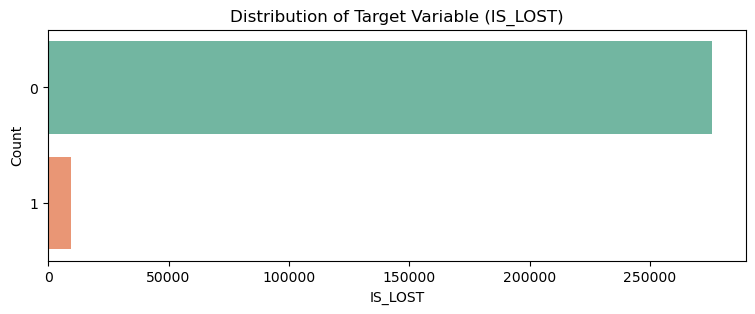

In [34]:
if 'IS_LOST' in df.columns:
    plt.figure(figsize=(9, 3))
    sns.countplot(y='IS_LOST', data=df, palette='Set2')
    plt.title('Distribution of Target Variable (IS_LOST)')
    plt.xlabel('IS_LOST')
    plt.ylabel('Count')
    plt.show()


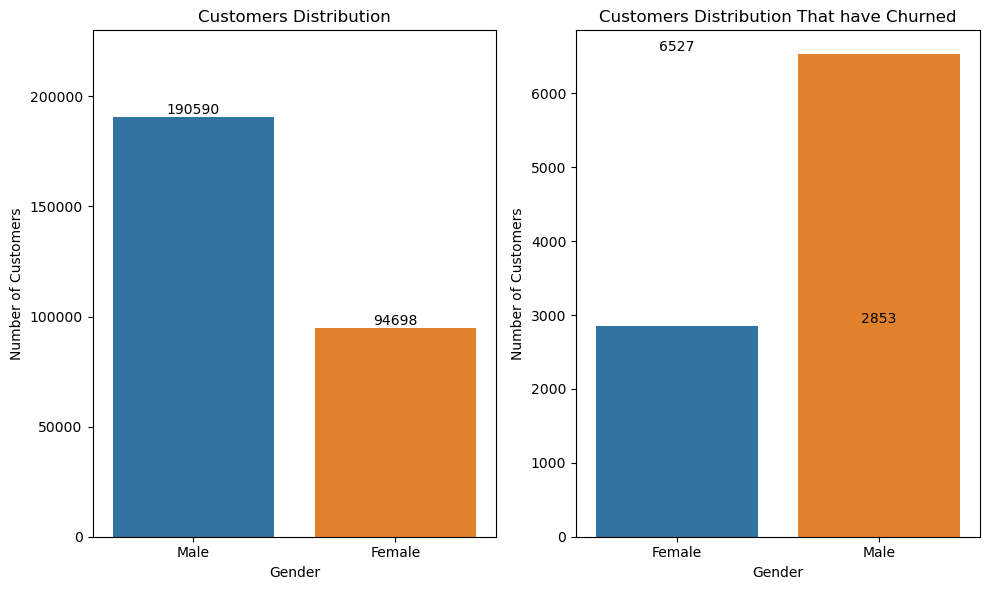

In [35]:
df.replace({'CUST_SEX': { 1: "Male", 2: "Female" }}, inplace = True)
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'CUST_SEX')
plt.title("Customers Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.ylim(0,230000)
for i, j in enumerate(df['CUST_SEX'].value_counts()):
    plt.text(i, j, str(j), ha='center', va='bottom')

plt.subplot(1,2,2)
sns.countplot(data = df[df['IS_LOST'] == 1], x = 'CUST_SEX')
plt.title("Customers Distribution That have Churned")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
for i, j in enumerate(df['CUST_SEX'][df['IS_LOST'] == 1].value_counts()):
    plt.text(i, j, str(j), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [36]:
df[df['Duration since Customer(Months)'] < 1] # Outlier Spotted

,USER_ID,Duration since Customer(Months),Amount Paid,Total Call Duration,Total Number of Call records,Number of SMS Sent,TOTAL_FLUX,CALL_DAYS,CALLING_DAYS,CALLED_DAYS,CALL_RING,CALLING_RING,CALLED_RING,CUST_SEX,CERT_AGE,IS_LOST
38845,U3114042924228515,-249,76.0,3731,55,0,279.626244,22,13,20,20,8,15,Male,28,0


In [37]:
df.drop(index=38845, inplace=True)
df.reset_index(drop=False, inplace=True)

#### » Detecting more Outliers

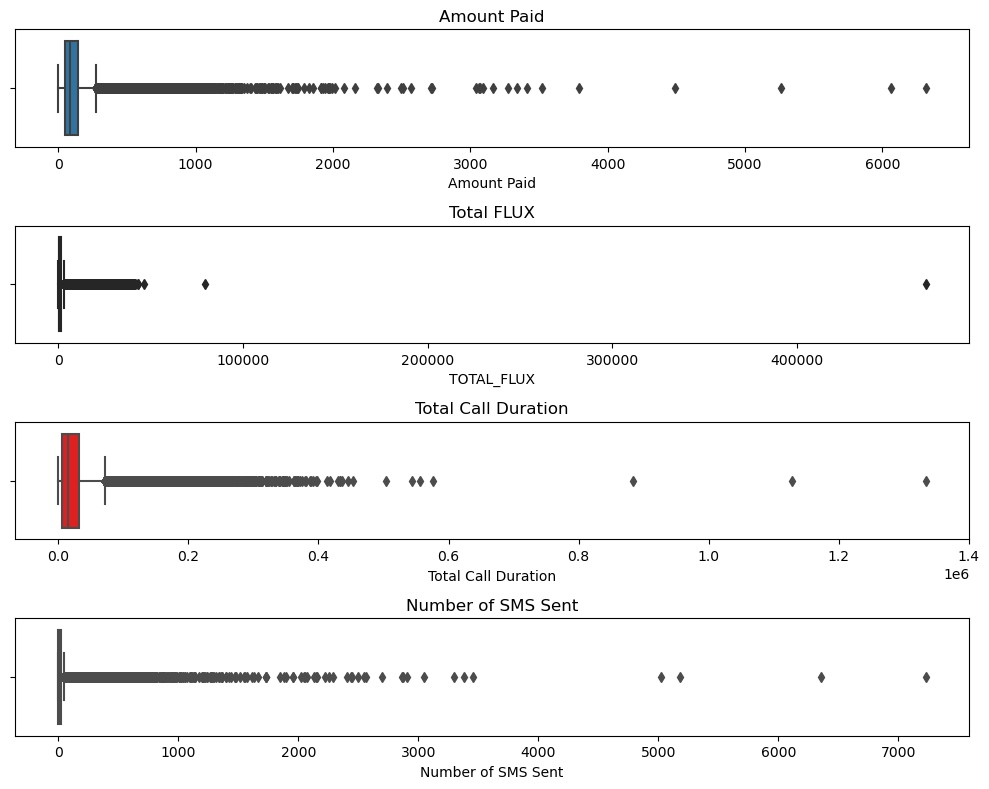

In [38]:
plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.title("Amount Paid")
sns.boxplot(data =df, x='Amount Paid')

plt.subplot(4,1,2)
plt.title("Total FLUX")
sns.boxplot(data =df, x='TOTAL_FLUX', color ='green')

plt.subplot(4,1,3)
plt.title("Total Call Duration")
sns.boxplot(data =df, x='Total Call Duration', color ='red')

plt.subplot(4,1,4)
plt.title("Number of SMS Sent")
sns.boxplot(data = df, x= 'Number of SMS Sent',color ='orange')

plt.tight_layout()
plt.show()

In [39]:
# Many outliers are detected, have to be dealt with keeping domain knowledege in mind

In [40]:
# Detecting anamolies as, even if a person pays maximum monthly charge of $50, then amount paid should be less than he/she enrolled for
outlierindexs = []
for i in range(len(df)):
    if df['Duration since Customer(Months)'][i] * 50 < df['Amount Paid'][i]:
        outlierindexs.append(i)
        

In [41]:
len(outlierindexs)

2120

In [42]:
# Dropping anamolies, to ensure true meaning of data 
df.drop(index = outlierindexs, inplace = True)
df.reset_index(drop=False, inplace=True)

In [43]:
# Dropping otheer extreme outliers
df.drop(df[df['TOTAL_FLUX'] > 100000].index, inplace=True)

In [44]:
# Reducing the Total Call Duration unit, to avoid large magnitude values
# Removing extreme outliers
df['Total Call Duration']  = df['Total Call Duration'] / 3600
df.drop(df[df['Total Call Duration'] > 125].index, inplace=True)

In [45]:
# Removing extreme outliers
df.drop(df[df['Number of SMS Sent'] > 2000].index, inplace=True)

In [46]:
# Keeping true outliers in the baseline model, to check model performance first

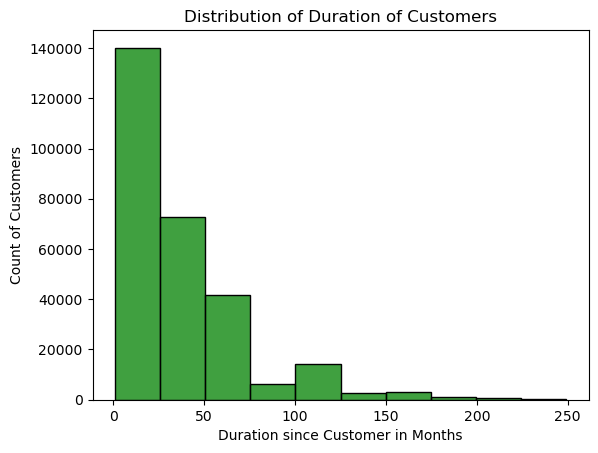

In [47]:
sns.histplot(data = df , x = 'Duration since Customer(Months)', bins=10, color='Green')
plt.title("Distribution of Duration of Customers")
plt.ylabel("Count of Customers")
plt.xlabel("Duration since Customer in Months")
plt.show()

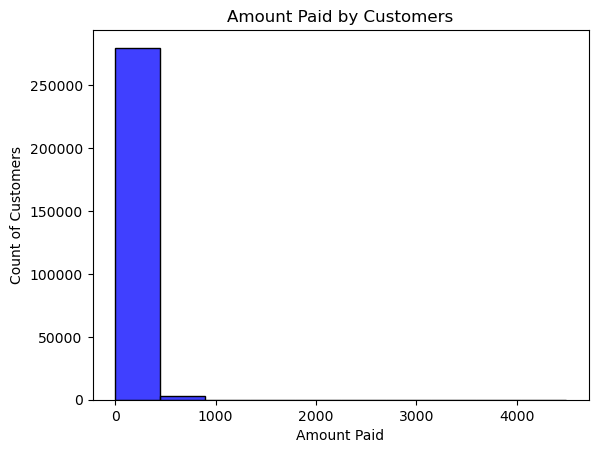

In [48]:
sns.histplot(data = df , x = 'Amount Paid', bins=10, color='Blue')
plt.title("Amount Paid by Customers")
plt.ylabel("Count of Customers")
plt.xlabel("Amount Paid")
plt.show()

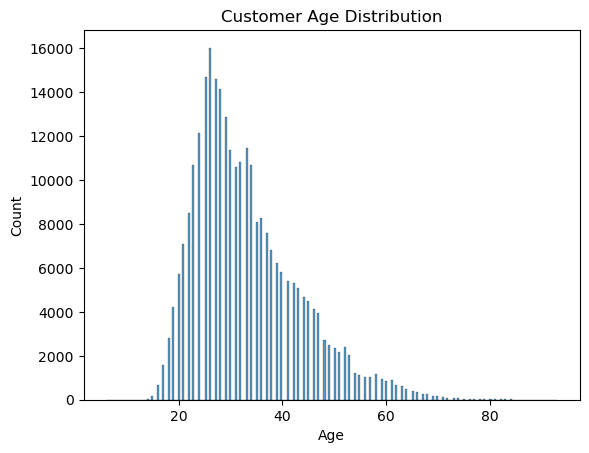

In [49]:
sns.histplot(data = df, x = 'CERT_AGE' )
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.show()

In [50]:
df.drop(columns = ['level_0', 'index'] , inplace = True)

In [51]:
df.shape

(283140, 16)

In [52]:
df.replace({'CUST_SEX': { "Male":1, "Female":0 }}, inplace = True) # Male : 1 , Female : 0

### <font color='blue'> Phase 3: Model Implementation and Baseline Evaluation </font>

#### » Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [54]:
X = df.drop(columns = ['IS_LOST', 'USER_ID'] )
Y = df['IS_LOST']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42 )

In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_train, Y_train)

LogisticRegression()

In [57]:
Y_pred = model.predict(X_test)

In [58]:
accuracy_score_log = accuracy_score(Y_pred, Y_test)
print(accuracy_score_log)
classification_report_log = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report_log)

0.9667655576746486
{'0': {'precision': 0.9998721531240298, 'recall': 0.9668850779746031, 'f1-score': 0.9831019807136315, 'support': 56621.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0}, 'accuracy': 0.9667655576746486, 'macro avg': {'precision': 0.4999360765620149, 'recall': 0.48344253898730155, 'f1-score': 0.49155099035681576, 'support': 56628.0}, 'weighted avg': {'precision': 0.9997485551676855, 'recall': 0.9667655576746486, 'f1-score': 0.9829804557813543, 'support': 56628.0}}


- Our Model is able to predict class 0 with good accuracy.
- It struggles to identify class 1, which is due to class imbalance problem.
- We will deal with class imbalance problem, using undersampling the minoirty class + using SMOTE

#### » Random Forest Classifier

In [59]:
# Let's try one ensemble method before handling class imbalance
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

In [61]:
accuracy_score_rf = accuracy_score(Y_pred, Y_test)
print(accuracy_score_rf)
classification_report_rf = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report_rf)

0.9716571307480398
{'0': {'precision': 0.9963837597939839, 'recall': 0.9748579393159644, 'f1-score': 0.9855033193334236, 'support': 55962.0}, '1': {'precision': 0.2496, 'recall': 0.7027027027027027, 'f1-score': 0.36835891381345925, 'support': 666.0}, 'accuracy': 0.9716571307480398, 'macro avg': {'precision': 0.6229918798969919, 'recall': 0.8387803210093336, 'f1-score': 0.6769311165734414, 'support': 56628.0}, 'weighted avg': {'precision': 0.9876008611568645, 'recall': 0.9716571307480398, 'f1-score': 0.9782451047739072, 'support': 56628.0}}


- Though random forest being an ensemble method, can handle class imbalance, which results in increased **recall** performance of the model.
- It is good to handle class imbalance

In [62]:
len(df[df['IS_LOST'] == 0]), len(df[df['IS_LOST'] == 1]) # Class is highly imbalanced

(273838, 9302)

 ## »  Undersampling the Minority Class + Using SMOTE

In [63]:
import pandas as pd
from sklearn.utils import resample

X = df.drop(columns = ['IS_LOST', 'USER_ID'] )
Y = df['IS_LOST']

majority_class = df[df['IS_LOST'] == 0]
minority_class = df[df['IS_LOST'] == 1]

# Downsampling the majority class
n_samples_minority = len(minority_class) * 12
majority_downsampled = resample(majority_class, replace=False, n_samples=n_samples_minority, random_state=42)

df_downsampled = pd.concat([majority_downsampled, minority_class])
df_downsampled = df_downsampled.sample(frac=1, random_state=42)
df_downsampled.reset_index()

X_train = df_downsampled.drop(columns=['IS_LOST', 'USER_ID'])
Y_train = df_downsampled['IS_LOST']

In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(Y_train)
print("Before:", counter)
sm = SMOTE(sampling_strategy= 0.4, random_state = 139)
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)
counter = Counter(Y_train_smote)
print("After:", counter)

Before: Counter({0: 111624, 1: 9302})
After: Counter({0: 111624, 1: 44649})


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_smote, Y_train_smote, test_size=0.2, random_state=42)

#### » Logistic Regression

In [66]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_score(Y_pred, Y_test)

0.8302031674932011

In [67]:
accuracy_score_log = accuracy_score(Y_pred, Y_test)
print(accuracy_score_log)
classification_report_log = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.8302031674932011
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     23695
           1       0.62      0.75      0.68      7560

    accuracy                           0.83     31255
   macro avg       0.77      0.80      0.78     31255
weighted avg       0.84      0.83      0.84     31255



- Logistic Regression perform well after SMOTE on this data . Still, the accuracy is low due to the Reason that can be multicollinearity between 2-3 columns in the dataset
- We will rely on ensemble methods that works very well in these conditions

#### » Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_pred, Y_test)

0.9220924652055671

In [69]:
accuracy_score_rf = accuracy_score(Y_pred, Y_test)
print(accuracy_score_rf)
classification_report_rf = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.9220924652055671
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     22871
           1       0.83      0.90      0.86      8384

    accuracy                           0.92     31255
   macro avg       0.89      0.91      0.90     31255
weighted avg       0.93      0.92      0.92     31255



- **Random Forest Classifier** is now able to peform well with F1-score of 0th class reaching 0.99 and 1th class reaching 0.76

#### » XGBoost Model

In [70]:
import xgboost as xgb

In [71]:
xgb_model = xgb.XGBClassifier()

In [72]:
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
Y_pred = xgb_model.predict(X_test)

In [74]:
accuracy_score_xgb = accuracy_score(Y_pred, Y_test)
print(accuracy_score_xgb)
classification_report_xgb = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.89656055031195
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     22927
           1       0.78      0.85      0.81      8328

    accuracy                           0.90     31255
   macro avg       0.86      0.88      0.87     31255
weighted avg       0.90      0.90      0.90     31255



**XGBoost Classifer** also performs well, like random forest classifier.

#### » Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, Y_train)
Y_pred = nb_classifier.predict(X_test)

accuracy_score_nb = accuracy_score(Y_pred, Y_test)
print(accuracy_score_nb)
classification_report_nb = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.7165573508238682
              precision    recall  f1-score   support

           0       0.65      0.93      0.76     15401
           1       0.88      0.51      0.65     15854

    accuracy                           0.72     31255
   macro avg       0.77      0.72      0.70     31255
weighted avg       0.77      0.72      0.70     31255



#### » KNN

In [76]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_for_knn = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier.fit(X_train_for_knn, Y_train)

Y_pred = classifier.predict(X_test_scaled)

In [77]:
accuracy_score_knn = accuracy_score(Y_pred, Y_test)
print(accuracy_score_knn)
classification_report_knn = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.8811390177571589
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     21301
           1       0.84      0.77      0.81      9954

    accuracy                           0.88     31255
   macro avg       0.87      0.85      0.86     31255
weighted avg       0.88      0.88      0.88     31255



#### » Neural Networks

In [78]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_for_knn.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_for_knn, Y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss, accuracy_nn = model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {accuracy_nn}')


Epoch 1/10
3517/3517 [==============================] - 1s 350us/step - loss: 0.3381 - accuracy: 0.8527 - val_loss: 0.3196 - val_accuracy: 0.8627
Epoch 2/10
3517/3517 [==============================] - 1s 348us/step - loss: 0.3181 - accuracy: 0.8612 - val_loss: 0.3110 - val_accuracy: 0.8657
Epoch 3/10
3517/3517 [==============================] - 1s 336us/step - loss: 0.3133 - accuracy: 0.8638 - val_loss: 0.3152 - val_accuracy: 0.8639
Epoch 4/10
3517/3517 [==============================] - 1s 339us/step - loss: 0.3091 - accuracy: 0.8656 - val_loss: 0.3089 - val_accuracy: 0.8675
Epoch 5/10
3517/3517 [==============================] - 1s 344us/step - loss: 0.3064 - accuracy: 0.8672 - val_loss: 0.3055 - val_accuracy: 0.8707
Epoch 6/10
3517/3517 [==============================] - 1s 336us/step - loss: 0.3044 - accuracy: 0.8687 - val_loss: 0.3041 - val_accuracy: 0.8689
Epoch 7/10
3517/3517 [==============================] - 1s 338us/step - loss: 0.3021 - accuracy: 0.8689 - val_loss: 0.3036 -

In [79]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test_scaled)  
y_pred_labels = (y_pred_probs > 0.5).astype(int) 

classification_report_nn = classification_report(Y_test, y_pred_labels, output_dict = True)
print(classification_report(Y_test, y_pred_labels))


977/977 [==============================] - 0s 195us/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22120
           1       0.82      0.72      0.77      9135

    accuracy                           0.87     31255
   macro avg       0.85      0.83      0.84     31255
weighted avg       0.87      0.87      0.87     31255



### <font color='blue'> Phase 4: Hyperparameter Tuning </font>

#### » After HyperParameter Tuning and All Outliers Removed

In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


# Removing all the extreme outliers 
df_new = df.drop(df[df['TOTAL_FLUX'] > 2000].index)
df_new = df.drop(df[df['Total Call Duration'] > 15].index)
df_new = df.drop(df[df['Number of SMS Sent'] > 25].index)
df_new = df.drop(df[df['Amount Paid'] > 230].index)
df_new = df_new.drop(columns = ['CUST_SEX'])

In [81]:
df_new.columns

Index(['USER_ID', 'Duration since Customer(Months)', 'Amount Paid',
       'Total Call Duration', 'Total Number of Call records',
       'Number of SMS Sent', 'TOTAL_FLUX', 'CALL_DAYS', 'CALLING_DAYS',
       'CALLED_DAYS', 'CALL_RING', 'CALLING_RING', 'CALLED_RING', 'CERT_AGE',
       'IS_LOST'],
      dtype='object')

In [82]:
import pandas as pd
from sklearn.utils import resample

X = df_new.drop(columns = ['IS_LOST', 'USER_ID'] )
Y = df_new['IS_LOST']

majority_class = df_new[df_new['IS_LOST'] == 0]
minority_class = df_new[df_new['IS_LOST'] == 1]

# Downsampling the majority class
n_samples_minority = len(minority_class) * 12
majority_downsampled = resample(majority_class, replace=False, n_samples=n_samples_minority, random_state=42)

df_downsampled = pd.concat([majority_downsampled, minority_class])
df_downsampled = df_downsampled.sample(frac=1, random_state=42)
df_downsampled.reset_index()

X_train = df_downsampled.drop(columns=['IS_LOST', 'USER_ID'])
Y_train = df_downsampled['IS_LOST']

from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(Y_train)
print("Before:", counter)
sm = SMOTE(sampling_strategy= 0.4, random_state = 139)
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)
counter = Counter(Y_train_smote)
print("After:", counter)

Before: Counter({0: 110052, 1: 9171})
After: Counter({0: 110052, 1: 44020})


In [83]:
X_train,X_test, Y_train, Y_test = train_test_split(X_train_smote, Y_train_smote, test_size = 0.2 , random_state = 42 )

In [84]:
warnings.filterwarnings('ignore') 
from sklearn.model_selection import GridSearchCV
# Initializing classifiers with default parameters
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    
}

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': np.arange(1, 20), 'criterion': ['gini', 'entropy']},
    'XGBoost': {'max_depth': [3, 5, 7, 9, 11, 13, 15], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [10, 50, 100, 200]},
    'Naive Bayes': {},
    'KNN': {'n_neighbors': np.arange(1, 20)} }

# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}
for classifier_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='f1', cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_classifiers[classifier_name] = grid_search.best_estimator_
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")

#### » Random Forest Classifier
#### » Random Forest: Best parameters - {'criterion': 'gini', 'max_depth': 19, 'n_estimators': 200}, Best score - 0.7421485570076316

In [85]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 19, n_estimators= 200)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
accuracy_score_rf_new = accuracy_score(Y_pred, Y_test)
print(accuracy_score_rf_new)
classification_report_rf_new = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.9184812591270485
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     22732
           1       0.82      0.89      0.85      8083

    accuracy                           0.92     30815
   macro avg       0.89      0.91      0.90     30815
weighted avg       0.92      0.92      0.92     30815



In [86]:
Y_test_bin = label_binarize(Y_test, classes=[0, 1])
fpr_rf, tpr_rf, _ = roc_curve(Y_test_bin, Y_pred)
roc_auc_rf = roc_auc_score(Y_test_bin, Y_pred)

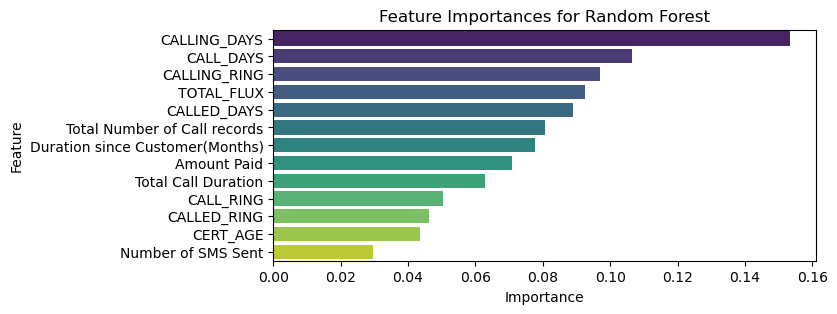

In [87]:
importances = rf.feature_importances_
features = df_new.drop(['USER_ID', 'IS_LOST'], axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(7, 3))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title("Feature Importances for Random Forest")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### » XGBoost Model
#### » XGBoost: Best parameters - {'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 200}, Best score - 0.8898209360971056

In [88]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.3, max_depth= 15, n_estimators= 200)
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
accuracy_score_xgb_new = accuracy_score(Y_pred, Y_test)
print(accuracy_score_xgb_new)
classification_report_xgb_new = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.9372708096706149
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22113
           1       0.88      0.90      0.89      8702

    accuracy                           0.94     30815
   macro avg       0.92      0.92      0.92     30815
weighted avg       0.94      0.94      0.94     30815



In [89]:
Y_test_bin = label_binarize(Y_test, classes=[0, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test_bin, Y_pred)
roc_auc_xgb = roc_auc_score(Y_test_bin, Y_pred)

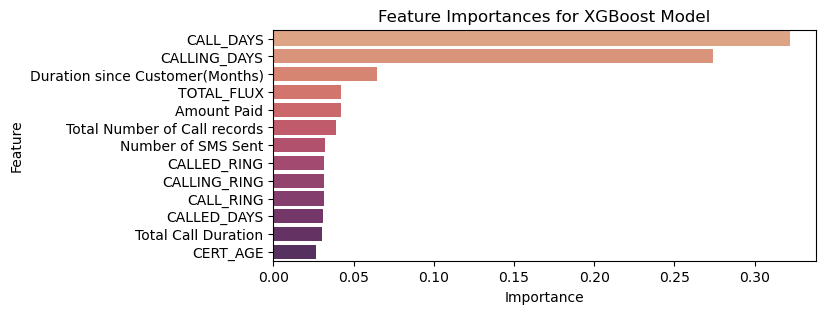

In [90]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7, 3))
sns.barplot(x=importances[indices], y=features[indices], palette='flare')
plt.title("Feature Importances for XGBoost Model")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### » KNN
#### » KNN: Best parameters - {'n_neighbors': 2}, Best score - 0.8974234789399809

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train)
X_test_knn = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train_knn, Y_train)

accuracy_score_knn_new = accuracy_score(Y_pred, Y_test)
print(accuracy_score_knn_new)
classification_report_knn_new = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.9372708096706149
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22113
           1       0.88      0.90      0.89      8702

    accuracy                           0.94     30815
   macro avg       0.92      0.92      0.92     30815
weighted avg       0.94      0.94      0.94     30815



In [92]:
Y_test_bin = label_binarize(Y_test, classes=[0, 1])
fpr_knn, tpr_knn, _ = roc_curve(Y_test_bin, Y_pred)
roc_auc_knn = roc_auc_score(Y_test_bin, Y_pred)


#### » Naive Bayes

In [93]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, Y_train)
Y_pred = nb_classifier.predict(X_test)

accuracy_score_nb_new = accuracy_score(Y_pred, Y_test)
print(accuracy_score_nb_new)
classification_report_nb_new = classification_report(Y_pred, Y_test, output_dict=True)
print(classification_report(Y_pred, Y_test))

0.7251987668343339
              precision    recall  f1-score   support

           0       0.67      0.93      0.78     15782
           1       0.87      0.51      0.65     15033

    accuracy                           0.73     30815
   macro avg       0.77      0.72      0.71     30815
weighted avg       0.77      0.73      0.71     30815



In [94]:
Y_test_bin = label_binarize(Y_test, classes=[0, 1])
fpr_nb, tpr_nb, _ = roc_curve(Y_test_bin, Y_pred)
roc_auc_nb = roc_auc_score(Y_test_bin, Y_pred)

#### » Neural Networks

In [95]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train_knn.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_knn, Y_train, epochs=30, batch_size=32, validation_split=0.1)

test_loss, accuracy_new = model.evaluate(X_test_knn, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {accuracy_new}')


Epoch 1/30
3467/3467 [==============================] - 1s 318us/step - loss: 0.3755 - accuracy: 0.8348 - val_loss: 0.3576 - val_accuracy: 0.8446
Epoch 2/30
3467/3467 [==============================] - 1s 304us/step - loss: 0.3483 - accuracy: 0.8483 - val_loss: 0.3478 - val_accuracy: 0.8493
Epoch 3/30
3467/3467 [==============================] - 1s 330us/step - loss: 0.3412 - accuracy: 0.8509 - val_loss: 0.3417 - val_accuracy: 0.8490
Epoch 4/30
3467/3467 [==============================] - 1s 311us/step - loss: 0.3365 - accuracy: 0.8531 - val_loss: 0.3373 - val_accuracy: 0.8507
Epoch 5/30
3467/3467 [==============================] - 1s 318us/step - loss: 0.3331 - accuracy: 0.8541 - val_loss: 0.3347 - val_accuracy: 0.8537
Epoch 6/30
3467/3467 [==============================] - 1s 313us/step - loss: 0.3305 - accuracy: 0.8555 - val_loss: 0.3314 - val_accuracy: 0.8528
Epoch 7/30
3467/3467 [==============================] - 1s 305us/step - loss: 0.3283 - accuracy: 0.8567 - val_loss: 0.3296 -

In [96]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test_knn)  
y_pred_labels = (y_pred_probs > 0.5).astype(int)  

classification_report_nn_new = classification_report(Y_test, y_pred_labels, output_dict = True)
print(classification_report(Y_test, y_pred_labels))


963/963 [==============================] - 0s 208us/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     21994
           1       0.81      0.71      0.76      8821

    accuracy                           0.87     30815
   macro avg       0.85      0.82      0.83     30815
weighted avg       0.87      0.87      0.87     30815



In [97]:
Y_test_bin = label_binarize(y_pred_labels, classes=[0, 1])
fpr_nn, tpr_nn, _ = roc_curve(Y_test_bin, Y_pred)
roc_auc_nn = roc_auc_score(Y_test_bin, Y_pred)

### <font color='blue'> Phase 5: Model Evaluation and Comparative Analysis </font>

#### » KNN

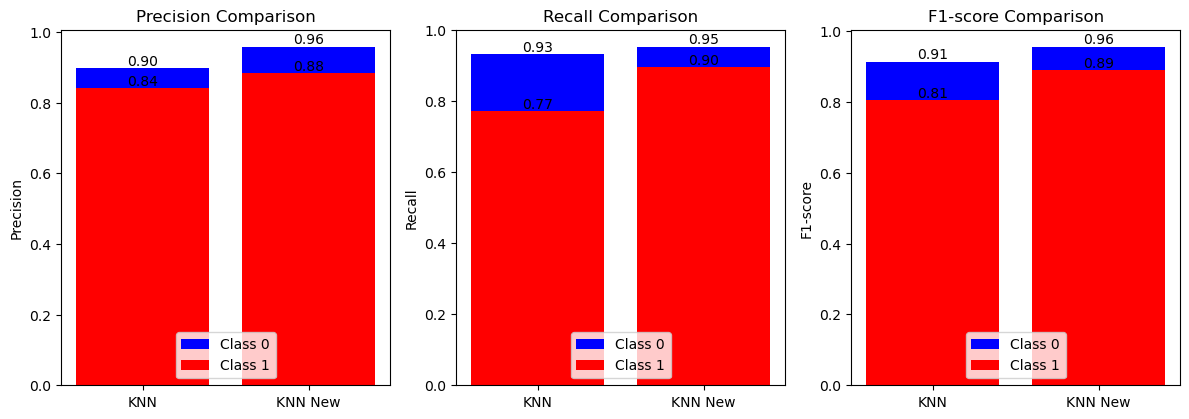

In [98]:
import matplotlib.pyplot as plt

precision_class_0 = [classification_report_knn['0']['precision'], classification_report_knn_new['0']['precision']]
recall_class_0 = [classification_report_knn['0']['recall'], classification_report_knn_new['0']['recall']]
f1_score_class_0 = [classification_report_knn['0']['f1-score'], classification_report_knn_new['0']['f1-score']]

precision_class_1 = [classification_report_knn['1']['precision'], classification_report_knn_new['1']['precision']]
recall_class_1 = [classification_report_knn['1']['recall'], classification_report_knn_new['1']['recall']]
f1_score_class_1 = [classification_report_knn['1']['f1-score'], classification_report_knn_new['1']['f1-score']]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.bar(['KNN', 'KNN New'], precision_class_0, color='b', label='Class 0')
plt.bar(['KNN', 'KNN New'], precision_class_1, color='r', label='Class 1')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.subplot(2, 3, 2)
plt.bar(['KNN', 'KNN New'], recall_class_0, color='b', label='Class 0')
plt.bar(['KNN', 'KNN New'], recall_class_1, color='r', label='Class 1')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, recall_class_0[i], f'{recall_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, recall_class_1[i], f'{recall_class_1[i]:.2f}', ha='center', va='bottom')

plt.subplot(2, 3, 3)
plt.bar(['KNN', 'KNN New'], f1_score_class_0, color='b', label='Class 0')
plt.bar(['KNN', 'KNN New'], f1_score_class_1, color='r', label='Class 1')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, f1_score_class_0[i], f'{f1_score_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, f1_score_class_1[i], f'{f1_score_class_1[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### » Random Forest Classifier

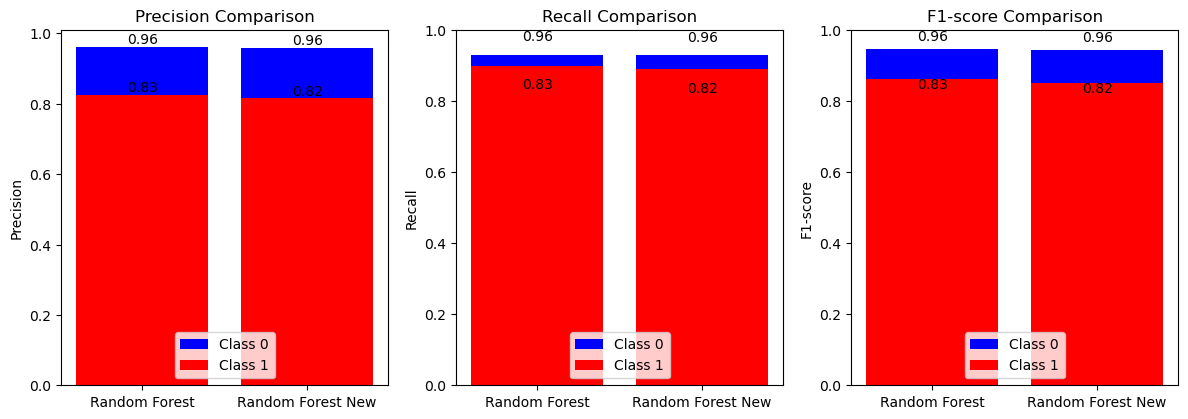

In [99]:
import matplotlib.pyplot as plt

precision_class_0 = [classification_report_rf['0']['precision'], classification_report_rf_new['0']['precision']]
recall_class_0 = [classification_report_rf['0']['recall'], classification_report_rf_new['0']['recall']]
f1_score_class_0 = [classification_report_rf['0']['f1-score'], classification_report_rf_new['0']['f1-score']]

precision_class_1 = [classification_report_rf['1']['precision'], classification_report_rf_new['1']['precision']]
recall_class_1 = [classification_report_rf['1']['recall'], classification_report_rf_new['1']['recall']]
f1_score_class_1 = [classification_report_rf['1']['f1-score'], classification_report_rf_new['1']['f1-score']]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.bar(['Random Forest', 'Random Forest New'], precision_class_0, color='b', label='Class 0')
plt.bar(['Random Forest', 'Random Forest New'], precision_class_1, color='r', label='Class 1')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')
    
plt.subplot(2, 3, 2)
plt.bar(['Random Forest', 'Random Forest New'], recall_class_0, color='b', label='Class 0')
plt.bar(['Random Forest', 'Random Forest New'], recall_class_1, color='r', label='Class 1')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')
    
plt.subplot(2, 3, 3)
plt.bar(['Random Forest', 'Random Forest New'], f1_score_class_0, color='b', label='Class 0')
plt.bar(['Random Forest', 'Random Forest New'], f1_score_class_1, color='r', label='Class 1')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### » XGBoost Model

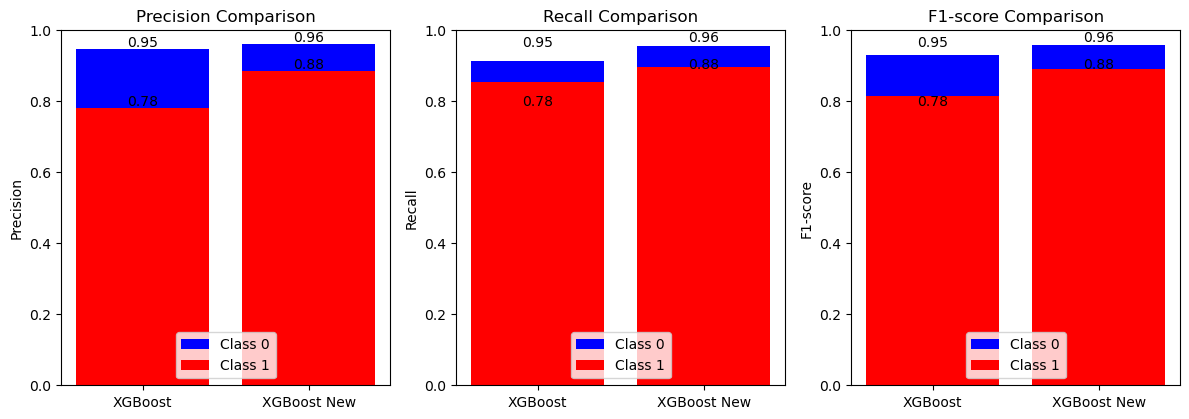

In [100]:
import matplotlib.pyplot as plt

precision_class_0 = [classification_report_xgb['0']['precision'], classification_report_xgb_new['0']['precision']]
recall_class_0 = [classification_report_xgb['0']['recall'], classification_report_xgb_new['0']['recall']]
f1_score_class_0 = [classification_report_xgb['0']['f1-score'], classification_report_xgb_new['0']['f1-score']]

precision_class_1 = [classification_report_xgb['1']['precision'], classification_report_xgb_new['1']['precision']]
recall_class_1 = [classification_report_xgb['1']['recall'], classification_report_xgb_new['1']['recall']]
f1_score_class_1 = [classification_report_xgb['1']['f1-score'], classification_report_xgb_new['1']['f1-score']]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.bar(['XGBoost', 'XGBoost New'], precision_class_0, color='b', label='Class 0')
plt.bar(['XGBoost', 'XGBoost New'], precision_class_1, color='r', label='Class 1')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.subplot(2, 3, 2)
plt.bar(['XGBoost', 'XGBoost New'], recall_class_0, color='b', label='Class 0')
plt.bar(['XGBoost', 'XGBoost New'], recall_class_1, color='r', label='Class 1')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')
    
plt.subplot(2, 3, 3)
plt.bar(['XGBoost', 'XGBoost New'], f1_score_class_0, color='b', label='Class 0')
plt.bar(['XGBoost', 'XGBoost New'], f1_score_class_1, color='r', label='Class 1')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### » Naive Bayes

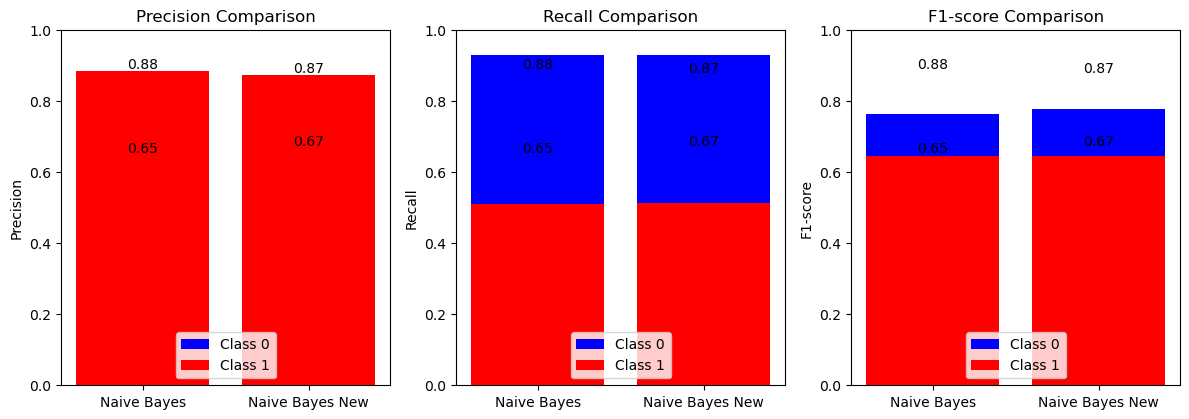

In [101]:
import matplotlib.pyplot as plt

precision_class_0 = [classification_report_nb['0']['precision'], classification_report_nb_new['0']['precision']]
recall_class_0 = [classification_report_nb['0']['recall'], classification_report_nb_new['0']['recall']]
f1_score_class_0 = [classification_report_nb['0']['f1-score'], classification_report_nb_new['0']['f1-score']]

precision_class_1 = [classification_report_nb['1']['precision'], classification_report_nb_new['1']['precision']]
recall_class_1 = [classification_report_nb['1']['recall'], classification_report_nb_new['1']['recall']]
f1_score_class_1 = [classification_report_nb['1']['f1-score'], classification_report_nb_new['1']['f1-score']]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.bar(['Naive Bayes', 'Naive Bayes New'], precision_class_0, color='b', label='Class 0')
plt.bar(['Naive Bayes', 'Naive Bayes New'], precision_class_1, color='r', label='Class 1')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')
    
plt.subplot(2, 3, 2)
plt.bar(['Naive Bayes', 'Naive Bayes New'], recall_class_0, color='b', label='Class 0')
plt.bar(['Naive Bayes', 'Naive Bayes New'], recall_class_1, color='r', label='Class 1')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.subplot(2, 3, 3)
plt.bar(['Naive Bayes', 'Naive Bayes New'], f1_score_class_0, color='b', label='Class 0')
plt.bar(['Naive Bayes', 'Naive Bayes New'], f1_score_class_1, color='r', label='Class 1')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


#### » Neural Networks

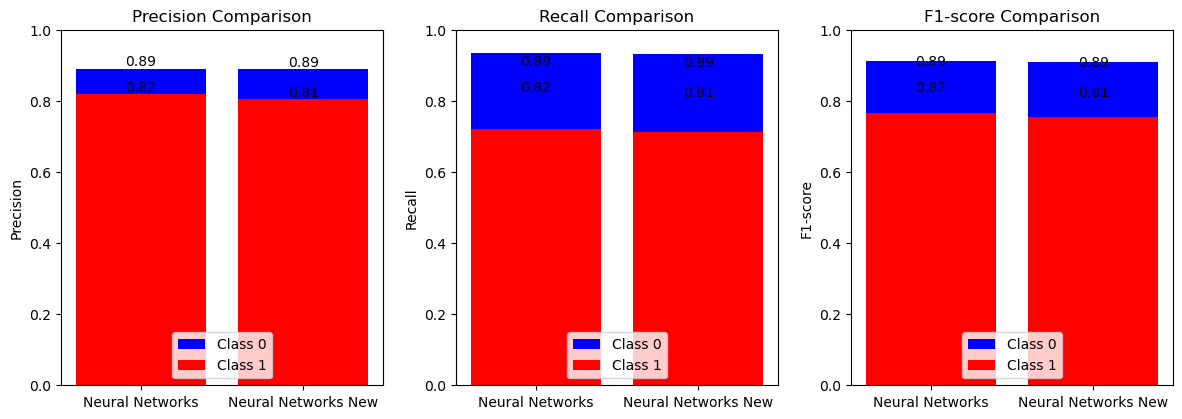

In [102]:
import matplotlib.pyplot as plt

precision_class_0 = [classification_report_nn['0']['precision'], classification_report_nn_new['0']['precision']]
recall_class_0 = [classification_report_nn['0']['recall'], classification_report_nn_new['0']['recall']]
f1_score_class_0 = [classification_report_nn['0']['f1-score'], classification_report_nn_new['0']['f1-score']]

precision_class_1 = [classification_report_nn['1']['precision'], classification_report_nn_new['1']['precision']]
recall_class_1 = [classification_report_nn['1']['recall'], classification_report_nn_new['1']['recall']]
f1_score_class_1 = [classification_report_nn['1']['f1-score'], classification_report_nn_new['1']['f1-score']]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.bar(['Neural Networks', 'Neural Networks New'], precision_class_0, color='b', label='Class 0')
plt.bar(['Neural Networks', 'Neural Networks New'], precision_class_1, color='r', label='Class 1')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.subplot(2, 3, 2)
plt.bar(['Neural Networks', 'Neural Networks New'], recall_class_0, color='b', label='Class 0')
plt.bar(['Neural Networks', 'Neural Networks New'], recall_class_1, color='r', label='Class 1')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

plt.subplot(2, 3, 3)
plt.bar(['Neural Networks', 'Neural Networks New'], f1_score_class_0, color='b', label='Class 0')
plt.bar(['Neural Networks', 'Neural Networks New'], f1_score_class_1, color='r', label='Class 1')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower center')
for i in range(2):
    plt.text(i, precision_class_0[i], f'{precision_class_0[i]:.2f}', ha='center', va='bottom')
    plt.text(i, precision_class_1[i], f'{precision_class_1[i]:.2f}', ha='center', va='bottom')

# plt.figure(figsize=(6, 4))
# plt.bar(['KNN', 'KNN New'], [accuracy_score_knn, accuracy_score_knn_new], color=['blue', 'green'])
# plt.title('Accuracy Comparison')
# plt.xlabel('Model')
# plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


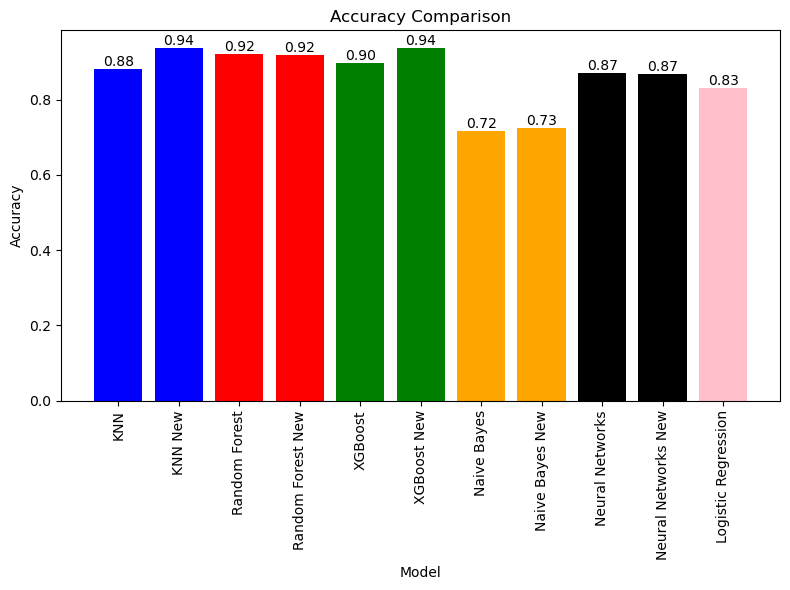

In [103]:
import matplotlib.pyplot as plt

accuracy_scores = {
    'KNN': accuracy_score_knn,
    'KNN New': accuracy_score_knn_new,
    'Random Forest': accuracy_score_rf,
    'Random Forest New': accuracy_score_rf_new,
    'XGBoost': accuracy_score_xgb,
    'XGBoost New': accuracy_score_xgb_new,
    'Naive Bayes': accuracy_score_nb,
    'Naive Bayes New': accuracy_score_nb_new,
    'Neural Networks': accuracy_nn,
    'Neural Networks New': accuracy_new,
    'Logistic Regression':accuracy_score_log
    
}

plt.figure(figsize=(8, 6))

models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.bar(models, scores, color=['blue', 'blue', 'red','red','green', 'green','orange','orange','black','black','pink']) 
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')


for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


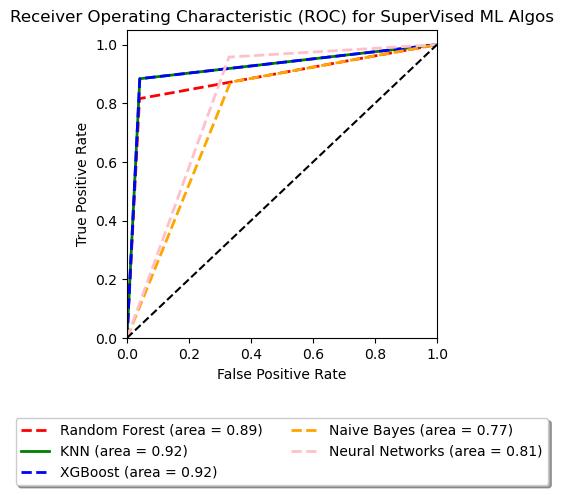

In [104]:
plt.figure(figsize=(4, 4))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2,linestyle='--', label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2,linestyle='-' ,label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2,linestyle='--', label=f'XGBoost (area = {roc_auc_xgb:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2,linestyle='--', label=f'Naive Bayes (area = {roc_auc_nb:.2f})')
plt.plot(fpr_nn, tpr_nn, color='pink', lw=2,linestyle='--', label=f'Neural Networks (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SuperVised ML Algos')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=2)
plt.show()

### <font color='blue'> Phase 6: Conclusion and Recommendations </font>

### Comparison of Model Performance:
**Random Forest (RF):**
Achieved high accuracy, precision, recall, and F1-score for both old and new models.
Known for its robust performance, particularly in handling noisy data and large feature sets.
Requires minimal feature engineering and is less prone to overfitting compared to other complex models.

**XGBoost (XGB):**
Demonstrated competitive performance, with slightly lower accuracy for the old model and improved accuracy for the new model.
XGBoost is an ensemble learning method based on gradient boosting, which often yields state-of-the-art results in various machine learning competitions.
Can handle missing data, multicollinearity, and non-linear relationships effectively.

**Naive Bayes:**
Showed relatively very good performance.
Naive Bayes is based on the assumption of independence between features, which may not hold true in many real-world datasets.
Despite its simplicity, Naive Bayes can perform well in text classification and other tasks with high-dimensional sparse data.

**K-Nearest Neighbors (KNN):**
Achieved moderate performance with max accuracy compared to other models.
It is a simple and intuitive algorithm but may suffer from computational inefficiency and the curse of dimensionality.

**Neural Networks:**
Demonstrated competitive performance.
Neural networks are highly flexible and capable of capturing complex patterns in data.
They require extensive computational resources, hyperparameter tuning, and data preprocessing but can yield state-of-the-art results in various domains.

### Computational Efficiency:
**Random Forest (RF) and XGBoost (XGB):**
Both algorithms are known for their scalability and efficiency, especially for large datasets, due to their ability to parallelize computations. RF and XGB can handle large feature sets and datasets efficiently, making them suitable for production environments.

**Naive Bayes:**
Naive Bayes is computationally efficient, as it only requires calculating simple probabilities based on the training data.
It can handle large datasets and is suitable for real-time applications where computational efficiency is crucial.

**K-Nearest Neighbors (KNN):**
KNN's computational complexity grows linearly with the size of the training data, making it less efficient for large datasets.
It requires storing the entire training dataset in memory, which can be memory-intensive for large datasets.

**Neural Networks:**
Neural networks can be computationally intensive, especially during training, particularly for deep architectures and large datasets.
Training neural networks often requires powerful hardware, such as GPUs, and may involve lengthy training times.

### Applicability:

**Random Forest (RF) and XGBoost (XGB):**
Suitable for a wide range of tasks, including classification and regression.
RF and XGB often perform well with minimal feature engineering and can handle both numerical and categorical data effectively.

**Naive Bayes:**
Suitable for text classification and other tasks with high-dimensional sparse data.
Naive Bayes is commonly used in spam filtering, sentiment analysis, and document categorization tasks.

**K-Nearest Neighbors (KNN):**
Suitable for small to medium-sized datasets and works well with feature scaling and low dimensionality.
KNN is intuitive and easy to understand but may not scale well to large datasets or high-dimensional spaces.

**Neural Networks:**
Versatile and applicable to various tasks, including image recognition, natural language processing, and time-series forecasting.
Neural networks offer flexibility and can handle complex relationships in data but may require extensive computational resources and careful tuning.